In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
df_compact = pd.read_csv('E:/Downloads/rpi_data_compact.csv')
df_compact.head(3)

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25


In [5]:
df_compact.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_compact.head(3)

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25


In [6]:
NaNs_in_df = df_compact.isnull()
print(type(NaNs_in_df))
NaNs_in_df.head()

<class 'pandas.core.frame.DataFrame'>


,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [7]:
NaNs_per_column = NaNs_in_df.sum()
print(type(NaNs_per_column))
NaNs_per_column.head()

<class 'pandas.core.series.Series'>


Ping (ms)            1
Download (Mbit/s)    1
Upload (Mbit/s)      7
Date                 7
Time                 7
dtype: int64

In [8]:
NaNs_total = NaNs_per_column.sum()
NaNs_total

23

In [9]:
df_compact.isnull().sum().sum()

23

In [10]:
NaNs_pct = np.round(df_compact.isnull().sum().sum()/float(len(df_compact)*len(df_compact.columns))*100, decimals = 4)
print('The DataFrame contains : {} NaNs, equal to {} of the measurements'.format(NaNs_total, NaNs_pct))

The DataFrame contains : 23 NaNs, equal to 0.6765 of the measurements


In [11]:
df_compact_clean = df_compact.dropna()

In [13]:
len(df_compact)

680

In [14]:
len(df_compact_clean)

673

In [15]:
df_compact_clean.dtypes

Ping (ms)             object
Download (Mbit/s)     object
Upload (Mbit/s)      float64
Date                  object
Time                  object
dtype: object

In [16]:
str_val = '10.56'
float_val = float(str_val)
print(str_val, type(str_val), float_val, type(float_val))

10.56 <class 'str'> 10.56 <class 'float'>


In [17]:
pd.options.mode.chained_assignment = None
df_compact_clean.rename(columns={'Ping (ms)': 'tempPing','Download (Mbit/s)':'tempDownload'},inplace = True)
df_compact_clean['Ping (ms)'] = df_compact_clean['tempPing'].apply(lambda dt_str:pd.to_numeric(dt_str))
df_compact_clean['Download (Mbit/s)'] = df_compact_clean['tempDownload'].apply(lambda dt_str:pd.to_numeric(dt_str))
df_compact_clean.drop(['tempPing','tempDownload'], axis=1, inplace = True)

In [18]:
df_compact_clean.dtypes

Upload (Mbit/s)      float64
Date                  object
Time                  object
Ping (ms)            float64
Download (Mbit/s)    float64
dtype: object

In [19]:
df_compact_clean.head()

,Upload (Mbit/s),Date,Time,Ping (ms),Download (Mbit/s)
0,14.31,2016-11-24,13:36:25,26.992,91.80
1,14.12,2016-11-24,13:36:55,24.532,88.19
2,14.11,2016-11-24,13:37:25,20.225,59.86
3,14.22,2016-11-24,13:37:57,19.332,91.81
4,14.08,2016-11-24,13:38:27,22.494,92.05


In [20]:
df_compact_clean = df_compact_clean.reindex(columns = ['Date', 'Time', 'Ping (ms)','Download (Mbit/s)','Upload (Mbit/s)'])
df_compact_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,13:36:25,26.992,91.80,14.31
1,2016-11-24,13:36:55,24.532,88.19,14.12
2,2016-11-24,13:37:25,20.225,59.86,14.11
3,2016-11-24,13:37:57,19.332,91.81,14.22
4,2016-11-24,13:38:27,22.494,92.05,14.08


In [21]:
df_compact_clean.to_csv('E:/Downloads/rpi_data_processed.csv', index=False)

In [22]:
means = df_compact_clean.mean()
stands = df_compact_clean.std()

In [23]:
stats_ping = (means['Ping (ms)'], stands['Ping (ms)'])
stats_download = (means['Download (Mbit/s)'], stands['Download (Mbit/s)'])
stats_upload = (means['Upload (Mbit/s)'], stands['Upload (Mbit/s)'])

print('Average ping time: {} ± {} ms'.format(stats_ping[0],stats_ping[1]))
print('Average download speed: {} ± {} Mbit/s'.format(*stats_download))
print('Average upload speed: {} ± {} Mbit/s'.format(*stats_upload))

Average ping time: 21.115451708766724 ± 5.161225495663228 ms
Average download speed: 90.44921248142644 ± 3.4656470318152284 Mbit/s
Average upload speed: 13.697607726597328 ± 1.0804708853031768 Mbit/s


In [24]:
mins = df_compact_clean.min()
maxs = df_compact_clean.max()

mima_ping = (mins['Ping (ms)'], maxs['Ping (ms)'])
mima_download = (mins['Download (Mbit/s)'], maxs['Download (Mbit/s)'])
mima_upload = (mins['Upload (Mbit/s)'], maxs['Upload (Mbit/s)'])

print('Min ping time: {} ms. Max ping time: {} ms'.format(*mima_ping))
print('Min download speed: {} Mbit/s. Max download speed: {} Mbit/s'.format(*mima_download))
print('Min upload speed: {} Mbit/s. Max upload speed: {} Mbit/s'.format(*mima_upload))

Min ping time: 16.167 ms. Max ping time: 76.528 ms
Min download speed: 58.48 Mbit/s. Max download speed: 92.87 Mbit/s
Min upload speed: 6.21 Mbit/s. Max upload speed: 14.55 Mbit/s


In [25]:
df_compact_clean.describe()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
count,673.000000,673.000000,673.000000
mean,21.115452,90.449212,13.697608
std,5.161225,3.465647,1.080471
min,16.167000,58.480000,6.210000
25%,19.115000,90.220000,13.640000
50%,20.322000,91.560000,13.980000
75%,21.843000,92.070000,14.180000
max,76.528000,92.870000,14.550000


In [26]:
argmin_ping = df_compact_clean['Ping (ms)'].argmin()
argmax_ping = df_compact_clean['Ping (ms)'].argmax()

argmin_download = df_compact_clean['Download (Mbit/s)'].argmin()
argmax_download = df_compact_clean['Download (Mbit/s)'].argmax()

argmin_upload = df_compact_clean['Upload (Mbit/s)'].argmin()
argmax_upload = df_compact_clean['Upload (Mbit/s)'].argmax()

In [27]:
df = pd.DataFrame({'Ping (ms)': [0,1], 'Download (Mbit/s)': [0,1],  'Upload (Mbit/s)': [0,1]})
df.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,0,0,0
1,1,1,1


In [28]:
df.iloc[0]['Ping (ms)'] = argmin_ping
df.iloc[1]['Ping (ms)'] = argmax_ping
df.iloc[0]['Download (Mbit/s)'] = argmin_download
df.iloc[1]['Download (Mbit/s)'] = argmax_ping
df.iloc[0]['Upload (Mbit/s)'] = argmin_upload
df.iloc[1]['Upload (Mbit/s)'] = argmax_upload

In [29]:
df.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,217,161,464
1,461,461,524


In [31]:
print('Ping measure reached minimum on {} at {}'.format(df_compact_clean.loc[argmin_ping, 'Date'], df_compact_clean.loc[argmin_ping, 'Time']))
print('Download measure reached minimum on {} at {}'.format(df_compact_clean.loc[argmin_download, 'Date'], df_compact_clean.loc[argmin_download, 'Time']))
print('Upload measure reached minimum on {} at {}'.format(df_compact_clean.loc[argmin_upload, 'Date'], df_compact_clean.loc[argmin_upload, 'Time']))
print('Ping measure reached maximum on {} at {}'.format(df_compact_clean.loc[argmax_ping, 'Date'], df_compact_clean.loc[argmax_ping, 'Time']))
print('Download measure reached maximum on {} at {}'.format(df_compact_clean.loc[argmax_download, 'Date'], df_compact_clean.loc[argmax_download, 'Time']))
print('Upload measure reached maximum on {} at {}'.format(df_compact_clean.loc[argmax_upload, 'Date'], df_compact_clean.loc[argmax_upload, 'Time']))

Ping measure reached minimum on 2016-11-24 at 15:26:20
Download measure reached minimum on 2016-11-24 at 14:57:55
Upload measure reached minimum on 2016-11-24 at 17:31:47
Ping measure reached maximum on 2016-11-24 at 17:30:06
Download measure reached maximum on 2016-11-24 at 17:02:49
Upload measure reached maximum on 2016-11-24 at 18:02:15


In [32]:
df_corr = df_compact_clean.corr()
df_corr

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
Ping (ms),1.000000,-0.045626,-0.463099
Download (Mbit/s),-0.045626,1.000000,0.083690
Upload (Mbit/s),-0.463099,0.083690,1.000000


In [33]:
corr = df_corr.values
print('Correlation coefficient between ping and download: {}'.format(corr[0, 1]))
print('Correlation coefficient between ping and upload: {}'.format(corr[0, 2]))
print('Correlation coefficient between upload and download: {}'.format(corr[2, 1]))

Correlation coefficient between ping and download: -0.04562611025837995
Correlation coefficient between ping and upload: -0.46309871383001827
Correlation coefficient between upload and download: 0.08368996933725129


In [34]:
%matplotlib inline

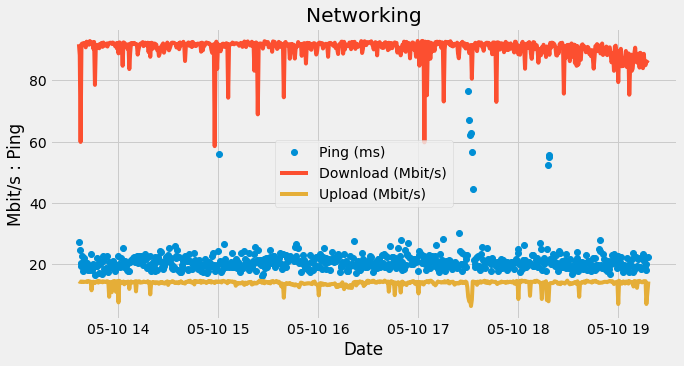

In [36]:
plt.style.use('fivethirtyeight')
    
fig, ax = plt.subplots(figsize=(10, 5))

t = pd.to_datetime(df_compact_clean['Time'])

ax.plot(t, df_compact_clean['Ping (ms)'],'o',label='Ping (ms)')
ax.plot(t, df_compact_clean['Download (Mbit/s)'], label='Download (Mbit/s)')
ax.plot(t, df_compact_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')

ax.set_xlabel('Date')
ax.set_ylabel('Mbit/s : Ping')
ax.set_title('Networking')

ax.tick_params(labelsize=14)
              
ax.legend()
plt.show()

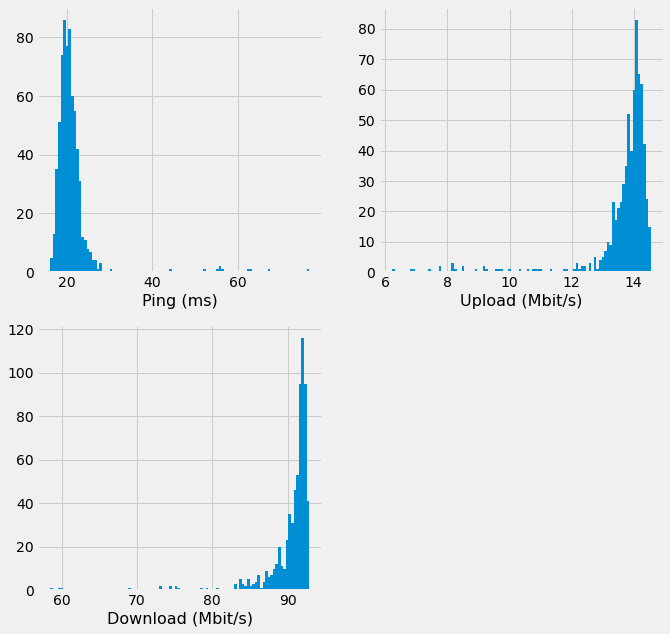

In [38]:
with plt.style.context('fivethirtyeight'):
    
    nbins = 100
    # Initialize figure
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    ax[0][0].hist(df_compact_clean['Ping (ms)'], nbins)
    ax[0][0].set_xlabel('Ping (ms)', fontsize=16)
    ax[0][0].tick_params(labelsize=14)
    ax[0][1].hist(df_compact_clean['Upload (Mbit/s)'], nbins)
    ax[0][1].set_xlabel('Upload (Mbit/s)', fontsize=16)
    ax[0][1].tick_params(labelsize=14)
    ax[1][0].hist(df_compact_clean['Download (Mbit/s)'], nbins)
    ax[1][0].set_xlabel('Download (Mbit/s)', fontsize=16)
    ax[1][0].tick_params(labelsize=14)
    ax[1][1].set_visible(False)